In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import time
import pandas

def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')
 
series = read_csv('air1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

print(series.head())
series.plot()
pyplot.show()

ValueError: unconverted data remains: 49

In [128]:
def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')
 
series = read_csv('air1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series

month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    118.0
1950-01-01    115.0
1950-02-01    126.0
1950-03-01    141.0
1950-04-01    135.0
1950-05-01    125.0
1950-06-01    149.0
1950-07-01    170.0
1950-08-01    170.0
1950-09-01    158.0
1950-10-01    133.0
1950-11-01    114.0
1950-12-01    140.0
1951-01-01    145.0
1951-02-01    150.0
1951-03-01    178.0
1951-04-01    163.0
1951-05-01    172.0
1951-06-01    178.0
              ...  
1958-07-01    491.0
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
1959-01-01    360.0
1959-02-01    342.0
1959-03-01    406.0
1959-04-01    396.0
1959-05-01    420.0
1959-06-01    472.0
1959-07-01    548.0
1959-08-01    559.0
1959-09-01    463.0
1959-10-01    407.0
1959-11-01    362.0
1959-12-01    405.0
1960-01-01    

In [85]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO


# SARIMA model test
# 12/03/2018
data= series
df = np.log(data)
df1=df.diff(periods=1)
df1_12=df1.diff(periods=12)
data= df1_12
my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 12)

start_time = time.time()
for i in range(0,100):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

33.72159004211426

In [77]:
sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order)

In [80]:
model_fit.aic

-483.3929617877098

In [45]:
model_fit=model.fit()
# yhat = model_fit.forecast()
# yhat

print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Fri, 11 Jan 2019   AIC                           -483.393
Time:                                    13:55:10   BIC                           -474.484
Sample:                                01-01-1949   HQIC                          -479.773
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4016      0.073     -5.501      0.000      -0.545      -0.259
ma.S.L12      -0.5570      0.096   

In [88]:
model_fit=model.fit()
# yhat = model_fit.forecast()
# yhat

print(model_fit.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Thu, 17 Jan 2019   AIC                           -483.393
Time:                                    13:20:47   BIC                           -474.484
Sample:                                01-01-1949   HQIC                          -479.773
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4016      0.073     -5.501      0.000      -0.545      -0.259
ma.S.L12      -0.5570      0.096   

In [24]:
data

month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01         NaN
1950-01-01         NaN
1950-02-01    0.056502
1950-03-01    0.000520
1950-04-01   -0.029569
1950-05-01   -0.018667
1950-06-01    0.095432
1950-07-01    0.057585
1950-08-01    0.000000
1950-09-01    0.016380
1950-10-01   -0.055853
1950-11-01   -0.028014
1950-12-01    0.114190
1951-01-01    0.087779
1951-02-01   -0.082880
1951-03-01    0.084643
1951-04-01   -0.064270
1951-05-01    0.188568
1951-06-01   -0.203916
                ...   
1958-07-01    0.034720
1958-08-01    0.034369
1958-09-01   -0.112861
1958-10-01    0.049048
1958-11-01   -0.025589
1958-12-01   -0.019172
1959-01-01    0.078175
1959-02-01    0.022507
1959-03-01    0.060520
1959-04-01    0.020923
1959-05-01    0.024007
1959-06-01   -0.092648
1959-

In [25]:
mod = sm.tsa.statespace.SARIMAX(data, trend='c', order=(0,1,1), seasonal_order=(0,1,1,12))
results = mod.fit()
print(results.summary())


                                 Statespace Model Results                                 
Dep. Variable:                              sales   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                  28.931
Date:                            Fri, 11 Jan 2019   AIC                            -49.862
Time:                                    13:30:14   BIC                            -37.983
Sample:                                01-01-1949   HQIC                           -45.035
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.95e-05      0.000      0.276      0.783      -0.000       0.000
ma.L1         -0.9913      0.519   

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


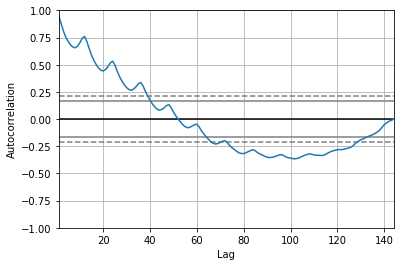

In [17]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                  144
Model:                    ARMA(12, 0)   Log Likelihood                -651.328
Method:                       css-mle   S.D. of innovations             20.423
Date:                Mon, 15 Oct 2018   AIC                           1330.656
Time:                        10:57:58   BIC                           1372.233
Sample:                    01-01-1949   HQIC                          1347.551
                         - 12-01-1960                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          280.7822        nan        nan        nan         nan         nan
ar.L1.sales      1.1059   1.42e-05    7.8e+04      0.000       1.106       1.106
ar.L2.sales     -0.6801   1.36e-05  -4.99e+0

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is de

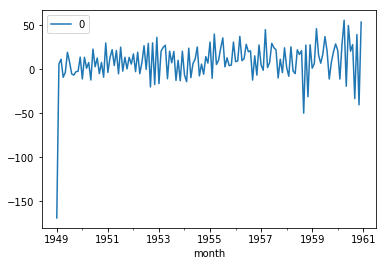

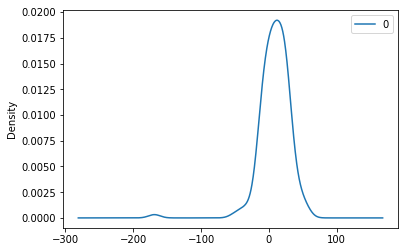

                0
count  144.000000
mean     8.704692
std     23.380843
min   -168.782165
25%     -3.618866
50%      9.552613
75%     22.065127
max     55.637698


In [14]:
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order=(12,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, flo

predicted=375.997342, expected=360.000000
predicted=362.817093, expected=342.000000
predicted=344.588733, expected=406.000000
predicted=434.104610, expected=396.000000
predicted=383.658765, expected=420.000000


C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=430.027579, expected=472.000000
predicted=445.137917, expected=548.000000


C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=563.667113, expected=559.000000


C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


predicted=531.454551, expected=463.000000
predicted=403.795312, expected=407.000000
predicted=389.178313, expected=362.000000
predicted=359.148596, expected=405.000000
predicted=444.856721, expected=417.000000
predicted=411.212776, expected=391.000000
predicted=395.487888, expected=419.000000
predicted=432.802386, expected=461.000000
predicted=484.430326, expected=472.000000
predicted=464.546121, expected=535.000000
predicted=523.759816, expected=622.000000
predicted=628.020333, expected=606.000000


C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=579.822622, expected=508.000000
predicted=443.241807, expected=461.000000
predicted=446.354725, expected=390.000000
predicted=379.892367, expected=432.000000
Test MSE: 2345.263


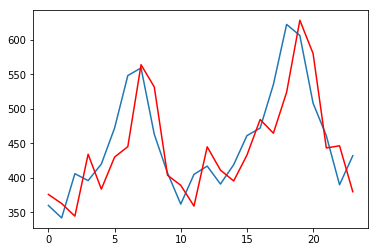

In [17]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 10/12)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(8,0,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [20]:

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [22]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')
 
series = read_csv('air1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=32412.886
ARIMA(0, 0, 1) MSE=9556.885
ARIMA(0, 1, 0) MSE=2295.610
ARIMA(0, 1, 1) MSE=2048.259
ARIMA(0, 1, 2) MSE=2175.944
ARIMA(0, 2, 0) MSE=3143.040
ARIMA(0, 2, 1) MSE=2366.082
ARIMA(0, 2, 2) MSE=2100.234
ARIMA(1, 0, 0) MSE=2335.659
ARIMA(1, 0, 1) MSE=2081.401
ARIMA(1, 0, 2) MSE=2179.986
ARIMA(1, 1, 0) MSE=2098.206
ARIMA(1, 1, 1) MSE=2097.060
ARIMA(1, 2, 0) MSE=3091.786
ARIMA(2, 0, 0) MSE=2118.484
ARIMA(2, 0, 1) MSE=2039.008
ARIMA(2, 1, 0) MSE=2040.894
ARIMA(2, 1, 1) MSE=1531.997
ARIMA(2, 1, 2) MSE=1607.598
ARIMA(2, 2, 0) MSE=2996.243
ARIMA(2, 2, 2) MSE=2058.033
ARIMA(4, 0, 0) MSE=2050.653
ARIMA(4, 1, 0) MSE=1949.787
ARIMA(4, 1, 1) MSE=1597.781
ARIMA(4, 1, 2) MSE=1611.965
ARIMA(4, 2, 0) MSE=2593.199
ARIMA(6, 0, 0) MSE=2025.621
ARIMA(6, 1, 0) MSE=1930.784
ARIMA(6, 1, 1) MSE=1396.318
ARIMA(6, 2, 0) MSE=2617.920
ARIMA(6, 2, 1) MSE=1982.599
ARIMA(8, 0, 0) MSE=2005.762
ARIMA(8, 1, 0) MSE=1395.844
ARIMA(8, 2, 0) MSE=2330.149
Best ARIMA(8, 1, 0) MSE=1395.844


In [23]:
p_values = [10,11,12]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [90]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import time


def parser(x):
    return datetime.strptime('19'+x, '%Y-%m')
 
series = read_csv('new_288_data.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()


ValueError: time data '191' does not match format '%Y-%m'

In [91]:
type(series)

pandas.core.series.Series

In [144]:
ts288=read_csv('new_288_data.csv',header=0, parse_dates=['DATE'], index_col=0, squeeze=True,date_parser=parser)
ts288

ValueError: time data '191949-01-01' does not match format '%Y-%m'

In [112]:
series = pd.Series(ts288['AIR'], index=ts288.index)

In [123]:
series
print(ts288.to_string())

           DATE   AIR
1    1949-01-01   112
2    1949-02-01   118
3    1949-03-01   132
4    1949-04-01   129
5    1949-05-01   121
6    1949-06-01   135
7    1949-07-01   148
8    1949-08-01   148
9    1949-09-01   136
10   1949-10-01   119
11   1949-11-01   104
12   1949-12-01   118
13   1950-01-01   115
14   1950-02-01   126
15   1950-03-01   141
16   1950-04-01   135
17   1950-05-01   125
18   1950-06-01   149
19   1950-07-01   170
20   1950-08-01   170
21   1950-09-01   158
22   1950-10-01   133
23   1950-11-01   114
24   1950-12-01   140
25   1951-01-01   145
26   1951-02-01   150
27   1951-03-01   178
28   1951-04-01   163
29   1951-05-01   172
30   1951-06-01   178
31   1951-07-01   199
32   1951-08-01   199
33   1951-09-01   184
34   1951-10-01   162
35   1951-11-01   146
36   1951-12-01   166
37   1952-01-01   171
38   1952-02-01   180
39   1952-03-01   193
40   1952-04-01   181
41   1952-05-01   183
42   1952-06-01   218
43   1952-07-01   230
44   1952-08-01   242
45   1952-

In [114]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO


# SARIMA model test
# 12/03/2018
data= series
df = np.log(data)
df1=df.diff(periods=1)
df1_12=df1.diff(periods=12)
data= df1_12
my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 12)

start_time = time.time()
for i in range(0,100):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

ValueError: Given a pandas object and the index does not contain dates

In [2]:
ts288=read_csv('new_288_data.csv', parse_dates=['DATE'], usecols=['DATE','AIR'],squeeze=True)
ts288

,DATE,AIR
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


In [3]:
series288 = read_csv('new_288_data.csv', header=0, parse_dates=['DATE'], index_col=0, squeeze=True, usecols=['DATE','AIR'])
series288
series288.to_csv('out288.csv')

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series288 = read_csv('out288.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,date_parser=parser)
series

DATE
1949-01-01     112
1949-02-01     118
1949-03-01     132
1949-04-01     129
1949-05-01     121
1949-06-01     135
1949-07-01     148
1949-08-01     148
1949-09-01     136
1949-10-01     119
1949-11-01     104
1949-12-01     118
1950-01-01     115
1950-02-01     126
1950-03-01     141
1950-04-01     135
1950-05-01     125
1950-06-01     149
1950-07-01     170
1950-08-01     170
1950-09-01     158
1950-10-01     133
1950-11-01     114
1950-12-01     140
1951-01-01     145
1951-02-01     150
1951-03-01     178
1951-04-01     163
1951-05-01     172
1951-06-01     178
              ... 
1970-07-01    1593
1970-08-01    1586
1970-09-01    1327
1970-10-01    1182
1970-11-01    1022
1970-12-01    1135
1971-01-01    1179
1971-02-01    1115
1971-03-01    1254
1971-04-01    1289
1971-05-01    1333
1971-06-01    1527
1971-07-01    1754
1971-08-01    1747
1971-09-01    1461
1971-10-01    1302
1971-11-01    1125
1971-12-01    1250
1972-01-01    1298
1972-02-01    1227
1972-03-01    1381
1972-04

In [167]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO


# SARIMA model test
# 12/03/2018
data= series
df = np.log(data)
df1=df.diff(periods=1)
df1_12=df1.diff(periods=12)
data= df1_12
my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 12)

start_time = time.time()
for i in range(0,1000):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

484.55554008483887

In [168]:
series864 = read_csv('new_864_data.csv', header=0, parse_dates=['DATE'], index_col=0, squeeze=True, usecols=['DATE','AIR'])
series864
series864.to_csv('out864.csv')

In [170]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

series = read_csv('out864.csv', header=0, parse_dates=[0], index_col=0, squeeze=True,date_parser=parser)
series

1949-01-01
1949-02-01       118
1949-03-01       132
1949-04-01       129
1949-05-01       121
1949-06-01       135
1949-07-01       148
1949-08-01       148
1949-09-01       136
1949-10-01       119
1949-11-01       104
1949-12-01       118
1950-01-01       115
1950-02-01       126
1950-03-01       141
1950-04-01       135
1950-05-01       125
1950-06-01       149
1950-07-01       170
1950-08-01       170
1950-09-01       158
1950-10-01       133
1950-11-01       114
1950-12-01       140
1951-01-01       145
1951-02-01       150
1951-03-01       178
1951-04-01       163
1951-05-01       172
1951-06-01       178
1951-07-01       199
               ...  
2018-07-01    161700
2018-08-01    160993
2018-09-01    134713
2018-10-01    119996
2018-11-01    103745
2018-12-01    115178
2019-01-01    119688
2019-02-01    113123
2019-03-01    127283
2019-04-01    130843
2019-05-01    135268
2019-06-01    155008
2019-07-01    178038
2019-08-01    177258
2019-09-01    148324
2019-10-01    132120
20

In [171]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO


# SARIMA model test
# 12/03/2018
data= series
df = np.log(data)
df1=df.diff(periods=1)
df1_12=df1.diff(periods=12)
data= df1_12
my_order = (0, 1, 1)
my_seasonal_order = (0, 1, 1, 12)

start_time = time.time()
for i in range(0,100):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

1498.2334208488464

In [172]:
start_time = time.time()
for i in range(0,100):
    sm.tsa.statespace.SARIMAX(df, order=my_order, seasonal_order=my_seasonal_order).fit().aic
    i=i+1


time.time() - start_time

146.09043979644775

In [ ]:
###############################
## ESM                       ##
###############################

In [3]:
series = read_csv('air1.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.head()

month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: sales, dtype: float64

In [3]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [19]:
saledata=series;


pandas.core.series.Series

AttributeError: 'SimpleExpSmoothing' object has no attribute '_index'

In [20]:
SimpleExpSmoothing(cc).fit(smoothing_level=0.2,optimized=False)

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [11]:
pandas.date_range(series,start=index[0], end=index[-1], freq=12)

NameError: name 'index' is not defined

In [18]:
cc=series.to_frame()

In [19]:
type(cc)

pandas.core.frame.DataFrame

In [27]:
cc.head()

,sales
month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestam

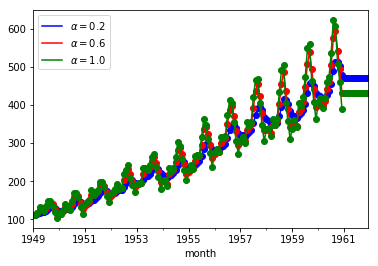

In [28]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(cc).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(cc).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(cc).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

pyplot.show()

In [29]:
# Holt’s Method Exponential Smoothing
fit1 = Holt(cc).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(cc, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(cc, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

pyplot.show()

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestam

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packa

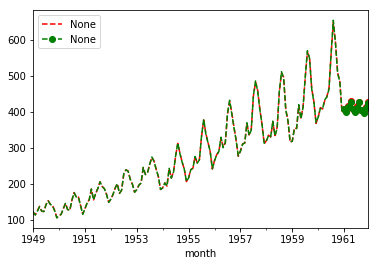

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [46]:
fit1 = ExponentialSmoothing(series, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(series, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(series, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(series, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red')
fit2.fittedvalues.plot(style='--', color='green')

fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

pyplot.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")


C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\ranbix\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestam

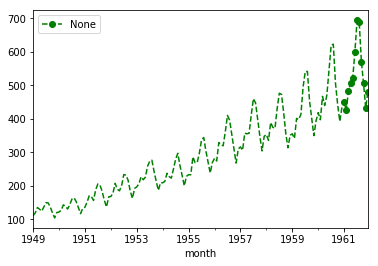

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [54]:
fit2 = ExponentialSmoothing(series, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
fit2.fittedvalues.plot(style='--', color='green')
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

pyplot.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")